<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_3_Assignments_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/static/public/94/data.csv")

In [ ]:
# Check for duplicates and missing values
print("Number of duplicate entries:", data.duplicated().sum())
print("Missing values per feature:\n", data.isnull().sum())

Number of duplicate entries: 391
Missing values per feature:
 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_

In [ ]:
# Check for duplicates and missing values
data = data.drop_duplicates().dropna()

In [ ]:
# Separate features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Custom Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, regularization_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.theta) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y)) + (self.regularization_param / self.m) * np.sign(self.theta)
            db = (1 / self.m) * np.sum(y_pred - y)

            # Update parameters
            self.theta -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

In [ ]:
# Train custom model
custom_model = LogisticRegression(learning_rate=0.001, regularization_param=0.01, num_iterations=5000)
custom_model.fit(X_train, y_train)

# Predict and evaluate custom model
y_custom_proba = custom_model.predict_proba(X_test)
y_custom_pred = custom_model.predict(X_test)
conf_matrix_custom = confusion_matrix(y_test, y_custom_pred)
precision_custom = precision_score(y_test, y_custom_pred)
recall_custom = recall_score(y_test, y_custom_pred)
average_precision_custom = average_precision_score(y_test, y_custom_proba)

print("Custom Model Performance:")
print("Confusion Matrix:\n", conf_matrix_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("Area under Precision-Recall Curve:", average_precision_custom)

Custom Model Performance:
Confusion Matrix:
 [[345  23]
 [ 46 218]]
Precision: 0.9045643153526971
Recall: 0.8257575757575758
Area under Precision-Recall Curve: 0.9279480563019082


In [ ]:
# Train scikit-learn model
sklearn_model = SklearnLogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42)
sklearn_model.fit(X_train, y_train)

# Predict probabilities
y_sklearn_proba = sklearn_model.predict_proba(X_test)[:, 1]

# Evaluate scikit-learn model
precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_test, y_sklearn_proba)
average_precision_sklearn = average_precision_score(y_test, y_sklearn_proba)

print("Scikit-learn Model Performance:")
print("Area under Precision-Recall Curve:", average_precision_sklearn)

Scikit-learn Model Performance:
Area under Precision-Recall Curve: 0.9491847420270513


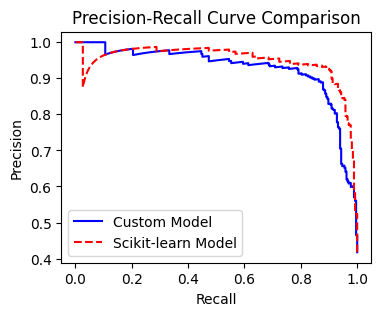

In [ ]:
# Plot Precision-Recall curve comparison
plt.figure(figsize=(4, 3))

# Custom model precision-recall
precision_custom, recall_custom, _ = precision_recall_curve(y_test, y_custom_proba)
plt.plot(recall_custom, precision_custom, label='Custom Model', color='blue')

# Scikit-learn precision-recall
plt.plot(recall_sklearn, precision_sklearn, label='Scikit-learn Model', linestyle='--', color='red')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()